In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('height weight.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

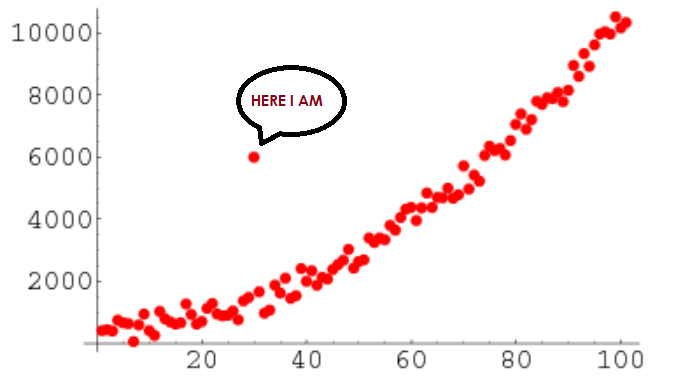

In [5]:
from PIL import Image
img = Image.open('out.png')
img

In [6]:
df.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

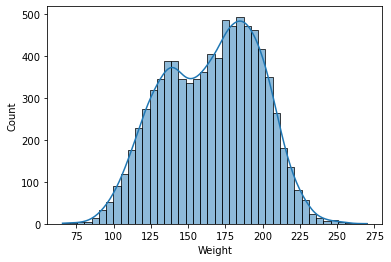

In [7]:
sns.histplot(df['Weight'],kde=True)

In [8]:
mean_value = df['Weight'].mean()

In [9]:
mean_value

165.63273532667586

In [10]:
std_value = df['Weight'].std()

In [11]:
std_value

32.04392221721549

In [12]:
std_3 = mean_value + (2.5 * std_value)
std_3

245.74254086971456

In [13]:
neg_std_3 = mean_value - (2.5 * std_value)
neg_std_3

85.52292978363714

In [14]:
df[df['Weight']>std_3]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741
3285,Male,78.528210,253.889004


In [15]:
merge = df[(df['Weight']>std_3) | (df['Weight']<neg_std_3)]


In [16]:
merge.shape

(27, 3)

In [17]:
remove_out_columns = df[(df['Weight']<std_3) | (df['Weight']>neg_std_3)]


In [18]:

remove_out_columns.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

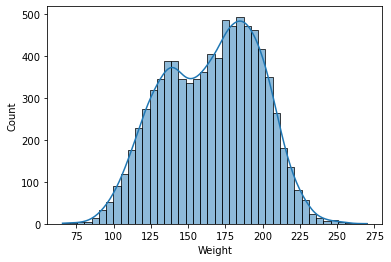

In [19]:
sns.histplot(remove_out_columns['Weight'],kde=True)

# One Hot Encoding

In [20]:
dummy_variable = pd.get_dummies(remove_out_columns['Gender'],drop_first=True)

In [21]:
dummy_variable.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [22]:
new_df = remove_out_columns.drop('Gender',axis=1)

In [23]:
new_df.head()


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [24]:
x = df.drop('Height',axis=1)

In [25]:
x['Gender'] = dummy_variable

In [26]:
x['Gender']

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: uint8

In [27]:
x.head()

,Gender,Weight
0,1,241.893563
1,1,162.310473
2,1,212.740856
3,1,220.042470
4,1,206.349801


In [28]:
y = df['Height']

In [29]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=42)

In [32]:
xtrain.shape

(5988, 2)

In [33]:

xtest.shape

(2567, 2)

In [34]:
ytrain.shape

(5988,)

# Linear Regression

In [42]:

from sklearn.linear_model import LinearRegression

In [43]:
lre = LinearRegression()

In [44]:
lre.fit(xtrain,ytrain)

LinearRegression()

In [45]:
lre.intercept_

47.07025696173818

In [46]:
lre.predict(xtest)

array([65.42014632, 70.33733669, 67.99670385, ..., 59.19198896,
       69.51480798, 62.2569794 ])

# Mean Squared Error

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
pred = lre.predict(xtest)

In [50]:
mean_squared_error(ytest,pred)

1.9799087490256

In [51]:
r2_score(ytest,pred)

0.86570487947332

# K-Nearest Neighbors Algorithm

In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [36]:
knn = KNeighborsRegressor(n_neighbors=100)

In [37]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=100)

In [39]:
pred2 = knn.predict(xtest)

In [52]:
mean_squared_error(ytest,pred2)

2.0459033825726625

In [53]:
r2_score(ytest,pred)

0.86570487947332